<a href="https://colab.research.google.com/github/buadeoye/RussoUkrainianWar_Dataset/blob/main/Naive_Bayes_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
import re #for regular expressions
import nltk #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [122]:
train = pd.read_csv('/content/positive_tagging1.csv')
test = pd.read_csv('/content/negative_tagging1.csv')


In [123]:
print(train.head())
print(test.head())

   Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

                                                              positive  
0  "I hope Edward Snowden is ok and managed to leave RussiaUkraineWar"  
1                                                                  NaN  
2                                                                  NaN  
3                                                                  NaN  
4                                                                  NaN  
   Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

                                                                                                                                                                                                  negative  
0                                                                                                                                                      

In [124]:
df = pd.read_csv('/content/Russia_Ukraine_Sentiment_Data.csv', encoding = 'ISO-8859-1')
df.head()

,Document,NEGATIVE+Sum(TF abs),POSITIVE+Sum(TF abs),Sentiment Score,Sentiment Prediction,Document class
0,"""I hope Edward Snowden is ok and managed to leave #Russia\n#UkraineWar""",0,2,1.000000,positive,I hope Edward Snowden is ok and managed to leave #Russia\n#UkraineWar
1,"""There has been an internecine war in #Ukraine \n\nbetween the true Armed Forces and the Azov Nazis,\n\nwith open warfare and shelling.\n\nIs this more of that, #StanGrant, Peter #Dutton,\n\n#insi...",6,4,-0.200000,negative,"There has been an internecine war in #Ukraine \n\nbetween the true Armed Forces and the Azov Nazis,\n\nwith open warfare and shelling.\n\nIs this more of that, #StanGrant, Peter #Dutton,\n\n#insid..."
2,"""@Masterfrogg @kjdonkers @SteIIa_Maris @PrisonPlanet WWIII would kill orders of magnitude more people than this war could ever hope to. And Ukraine would still be destroyed.""",4,2,-0.333333,negative,@Masterfrogg @kjdonkers @SteIIa_Maris @PrisonPlanet WWIII would kill orders of magnitude more people than this war could ever hope to. And Ukraine would still be destroyed.
3,"""Last week a majority of Americans Did Not want the US involved in War in Ukraine/Europe. The propaganda Machine is getting close. In two weeks it will have been decided... Death to #Russia on a n...",10,4,-0.428571,negative,Last week a majority of Americans Did Not want the US involved in War in Ukraine/Europe. The propaganda Machine is getting close. In two weeks it will have been decided... Death to #Russia on a ne...
4,"""Ukraine war: The TikToker spreading viral videos https://t.co/ZU7ITNQb6i""",2,0,-1.000000,negative,Ukraine war: The TikToker spreading viral videos https://t.co/ZU7ITNQb6i


In [125]:
df.rename(columns ={'Document': 'document','NEGATIVE+Sum(TF abs)': 'negative_sum_tf','POSITIVE+Sum(TF abs)': 'positive_sum_tf', 'Sentiment Score': 'sentiment_score', 'Sentiment Prediction': 'sentiment_prediction', 'Document class' : 'document_class'}, inplace = True )

In [126]:
df.head()

,document,negative_sum_tf,positive_sum_tf,sentiment_score,sentiment_prediction,document_class
0,"""I hope Edward Snowden is ok and managed to leave #Russia\n#UkraineWar""",0,2,1.000000,positive,I hope Edward Snowden is ok and managed to leave #Russia\n#UkraineWar
1,"""There has been an internecine war in #Ukraine \n\nbetween the true Armed Forces and the Azov Nazis,\n\nwith open warfare and shelling.\n\nIs this more of that, #StanGrant, Peter #Dutton,\n\n#insi...",6,4,-0.200000,negative,"There has been an internecine war in #Ukraine \n\nbetween the true Armed Forces and the Azov Nazis,\n\nwith open warfare and shelling.\n\nIs this more of that, #StanGrant, Peter #Dutton,\n\n#insid..."
2,"""@Masterfrogg @kjdonkers @SteIIa_Maris @PrisonPlanet WWIII would kill orders of magnitude more people than this war could ever hope to. And Ukraine would still be destroyed.""",4,2,-0.333333,negative,@Masterfrogg @kjdonkers @SteIIa_Maris @PrisonPlanet WWIII would kill orders of magnitude more people than this war could ever hope to. And Ukraine would still be destroyed.
3,"""Last week a majority of Americans Did Not want the US involved in War in Ukraine/Europe. The propaganda Machine is getting close. In two weeks it will have been decided... Death to #Russia on a n...",10,4,-0.428571,negative,Last week a majority of Americans Did Not want the US involved in War in Ukraine/Europe. The propaganda Machine is getting close. In two weeks it will have been decided... Death to #Russia on a ne...
4,"""Ukraine war: The TikToker spreading viral videos https://t.co/ZU7ITNQb6i""",2,0,-1.000000,negative,Ukraine war: The TikToker spreading viral videos https://t.co/ZU7ITNQb6i


**Data Cleaning**

In [127]:
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text

In [128]:
df['doc_clean'] = np.vectorize(remove_pattern)(df['document'],"@[\w]*") 
df.head()

,document,negative_sum_tf,positive_sum_tf,sentiment_score,sentiment_prediction,document_class,doc_clean
0,"""I hope Edward Snowden is ok and managed to leave #Russia\n#UkraineWar""",0,2,1.000000,positive,I hope Edward Snowden is ok and managed to leave #Russia\n#UkraineWar,"""I hope Edward Snowden is ok and managed to leave #Russia\n#UkraineWar"""
1,"""There has been an internecine war in #Ukraine \n\nbetween the true Armed Forces and the Azov Nazis,\n\nwith open warfare and shelling.\n\nIs this more of that, #StanGrant, Peter #Dutton,\n\n#insi...",6,4,-0.200000,negative,"There has been an internecine war in #Ukraine \n\nbetween the true Armed Forces and the Azov Nazis,\n\nwith open warfare and shelling.\n\nIs this more of that, #StanGrant, Peter #Dutton,\n\n#insid...","""There has been an internecine war in #Ukraine \n\nbetween the true Armed Forces and the Azov Nazis,\n\nwith open warfare and shelling.\n\nIs this more of that, #StanGrant, Peter #Dutton,\n\n#insi..."
2,"""@Masterfrogg @kjdonkers @SteIIa_Maris @PrisonPlanet WWIII would kill orders of magnitude more people than this war could ever hope to. And Ukraine would still be destroyed.""",4,2,-0.333333,negative,@Masterfrogg @kjdonkers @SteIIa_Maris @PrisonPlanet WWIII would kill orders of magnitude more people than this war could ever hope to. And Ukraine would still be destroyed.,""" WWIII would kill orders of magnitude more people than this war could ever hope to. And Ukraine would still be destroyed."""
3,"""Last week a majority of Americans Did Not want the US involved in War in Ukraine/Europe. The propaganda Machine is getting close. In two weeks it will have been decided... Death to #Russia on a n...",10,4,-0.428571,negative,Last week a majority of Americans Did Not want the US involved in War in Ukraine/Europe. The propaganda Machine is getting close. In two weeks it will have been decided... Death to #Russia on a ne...,"""Last week a majority of Americans Did Not want the US involved in War in Ukraine/Europe. The propaganda Machine is getting close. In two weeks it will have been decided... Death to #Russia on a n..."
4,"""Ukraine war: The TikToker spreading viral videos https://t.co/ZU7ITNQb6i""",2,0,-1.000000,negative,Ukraine war: The TikToker spreading viral videos https://t.co/ZU7ITNQb6i,"""Ukraine war: The TikToker spreading viral videos https://t.co/ZU7ITNQb6i"""


In [129]:
df['doc_clean'] = df['doc_clean'] .str.replace("[^a-zA-Z#]"," ")
df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,document,negative_sum_tf,positive_sum_tf,sentiment_score,sentiment_prediction,document_class,doc_clean
0,"""I hope Edward Snowden is ok and managed to leave #Russia\n#UkraineWar""",0,2,1.000000,positive,I hope Edward Snowden is ok and managed to leave #Russia\n#UkraineWar,I hope Edward Snowden is ok and managed to leave #Russia #UkraineWar
1,"""There has been an internecine war in #Ukraine \n\nbetween the true Armed Forces and the Azov Nazis,\n\nwith open warfare and shelling.\n\nIs this more of that, #StanGrant, Peter #Dutton,\n\n#insi...",6,4,-0.200000,negative,"There has been an internecine war in #Ukraine \n\nbetween the true Armed Forces and the Azov Nazis,\n\nwith open warfare and shelling.\n\nIs this more of that, #StanGrant, Peter #Dutton,\n\n#insid...",There has been an internecine war in #Ukraine between the true Armed Forces and the Azov Nazis with open warfare and shelling Is this more of that #StanGrant Peter #Dutton #insiders ...
2,"""@Masterfrogg @kjdonkers @SteIIa_Maris @PrisonPlanet WWIII would kill orders of magnitude more people than this war could ever hope to. And Ukraine would still be destroyed.""",4,2,-0.333333,negative,@Masterfrogg @kjdonkers @SteIIa_Maris @PrisonPlanet WWIII would kill orders of magnitude more people than this war could ever hope to. And Ukraine would still be destroyed.,WWIII would kill orders of magnitude more people than this war could ever hope to And Ukraine would still be destroyed
3,"""Last week a majority of Americans Did Not want the US involved in War in Ukraine/Europe. The propaganda Machine is getting close. In two weeks it will have been decided... Death to #Russia on a n...",10,4,-0.428571,negative,Last week a majority of Americans Did Not want the US involved in War in Ukraine/Europe. The propaganda Machine is getting close. In two weeks it will have been decided... Death to #Russia on a ne...,Last week a majority of Americans Did Not want the US involved in War in Ukraine Europe The propaganda Machine is getting close In two weeks it will have been decided Death to #Russia on a n...
4,"""Ukraine war: The TikToker spreading viral videos https://t.co/ZU7ITNQb6i""",2,0,-1.000000,negative,Ukraine war: The TikToker spreading viral videos https://t.co/ZU7ITNQb6i,Ukraine war The TikToker spreading viral videos https t co ZU ITNQb i


In [130]:
df['doc_clean']  = df['doc_clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #removing words whose length is less than 

In [131]:
tokenized_doc_clean = df['doc_clean'].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_doc_clean.head()

0                                                                                                                                              [hope, Edward, Snowden, managed, leave, #Russia, #UkraineWar]
1    [There, been, internecine, #Ukraine, between, true, Armed, Forces, Azov, Nazis, with, open, warfare, shelling, this, more, that, #StanGrant, Peter, #Dutton, #insiders, keen, hear, your, thoughts, ...
2                                                                                     [WWIII, would, kill, orders, magnitude, more, people, than, this, could, ever, hope, Ukraine, would, still, destroyed]
3    [Last, week, majority, Americans, want, involved, Ukraine, Europe, propaganda, Machine, getting, close, weeks, will, have, been, decided, Death, #Russia, pack, lies, #WWWIII, here, come, https, tU...
4                                                                                                                                                [Ukraine, TikToker, spreading, vira

In [134]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_doc_clean = tokenized_doc_clean.apply(lambda x: [stemmer.stem(i) for i in x]) #it will stemmatized all words in tweet

In [135]:
#now let's combine these tokens back

for i in range(len(tokenized_doc_clean)):
   tokenized_doc_clean[i] = ' '.join(tokenized_doc_clean[i]) #concat all words into one sentence
df['tokenized_doc_clean'] = tokenized_doc_clean

In [136]:
df.head()

,document,negative_sum_tf,positive_sum_tf,sentiment_score,sentiment_prediction,document_class,doc_clean,tokenized_doc_clean
0,"""I hope Edward Snowden is ok and managed to leave #Russia\n#UkraineWar""",0,2,1.000000,positive,I hope Edward Snowden is ok and managed to leave #Russia\n#UkraineWar,hope Edward Snowden managed leave #Russia #UkraineWar,hope edward snowden manag leav #russia #ukrainewar
1,"""There has been an internecine war in #Ukraine \n\nbetween the true Armed Forces and the Azov Nazis,\n\nwith open warfare and shelling.\n\nIs this more of that, #StanGrant, Peter #Dutton,\n\n#insi...",6,4,-0.200000,negative,"There has been an internecine war in #Ukraine \n\nbetween the true Armed Forces and the Azov Nazis,\n\nwith open warfare and shelling.\n\nIs this more of that, #StanGrant, Peter #Dutton,\n\n#insid...",There been internecine #Ukraine between true Armed Forces Azov Nazis with open warfare shelling this more that #StanGrant Peter #Dutton #insiders keen hear your thoughts #auspol https XukPqXhjBG,there been internecin #ukrain between true arm forc azov nazi with open warfar shell thi more that #stangrant peter #dutton #insid keen hear your thought #auspol http xukpqxhjbg
2,"""@Masterfrogg @kjdonkers @SteIIa_Maris @PrisonPlanet WWIII would kill orders of magnitude more people than this war could ever hope to. And Ukraine would still be destroyed.""",4,2,-0.333333,negative,@Masterfrogg @kjdonkers @SteIIa_Maris @PrisonPlanet WWIII would kill orders of magnitude more people than this war could ever hope to. And Ukraine would still be destroyed.,WWIII would kill orders magnitude more people than this could ever hope Ukraine would still destroyed,wwiii would kill order magnitud more peopl than thi could ever hope ukrain would still destroy
3,"""Last week a majority of Americans Did Not want the US involved in War in Ukraine/Europe. The propaganda Machine is getting close. In two weeks it will have been decided... Death to #Russia on a n...",10,4,-0.428571,negative,Last week a majority of Americans Did Not want the US involved in War in Ukraine/Europe. The propaganda Machine is getting close. In two weeks it will have been decided... Death to #Russia on a ne...,Last week majority Americans want involved Ukraine Europe propaganda Machine getting close weeks will have been decided Death #Russia pack lies #WWWIII here come https tUZkWYkIVG,last week major american want involv ukrain europ propaganda machin get close week will have been decid death #russia pack lie #wwwiii here come http tuzkwykivg
4,"""Ukraine war: The TikToker spreading viral videos https://t.co/ZU7ITNQb6i""",2,0,-1.000000,negative,Ukraine war: The TikToker spreading viral videos https://t.co/ZU7ITNQb6i,Ukraine TikToker spreading viral videos https ITNQb,ukrain tiktok spread viral video http itnqb


In [137]:
def to_sentiment(rating):
  rating = int(rating)
  if rating < 0:
    return 1
  elif rating == 0:
    return 0
  else: 
    return 2

df['sentiment'] = df.sentiment_score.apply(to_sentiment)

In [138]:
class_names = ['negative', 'neutral', 'positive']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


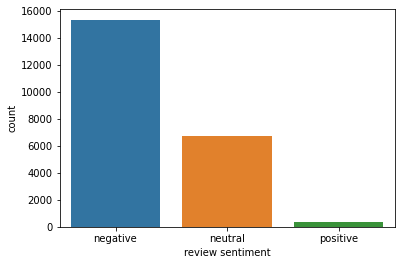

In [139]:
ax = sns.countplot(df.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

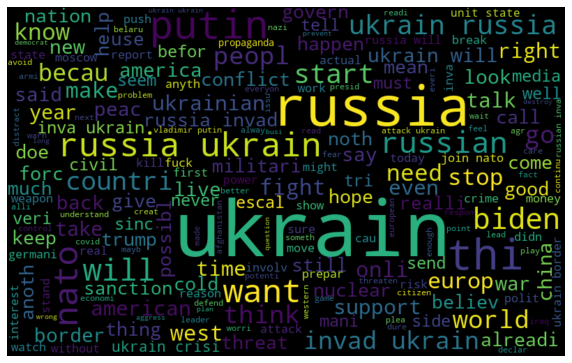

In [140]:
all_words = ' '.join([text for text in df['tokenized_doc_clean']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

The above wordcloud shows the various key words that were prevalent on the ongoing war in Ukraine.

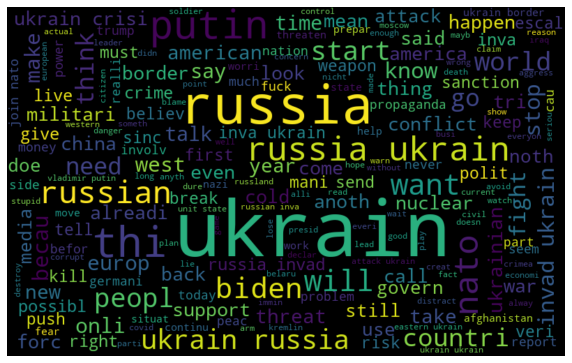

In [141]:
#Looking for the Negatives


negative_words= ' '.join([text for text in df['tokenized_doc_clean'][df['sentiment_prediction']== 'negative']])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

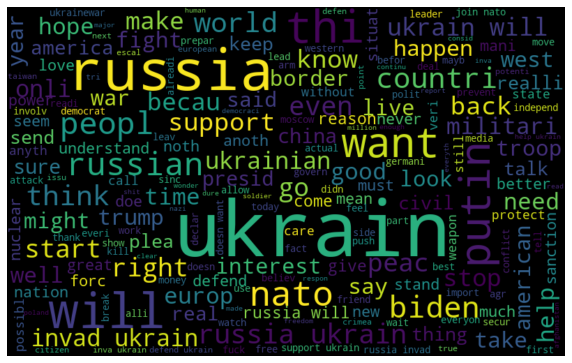

In [142]:
# Looking for the Positives in the word cloud

normal_words= ' '.join([text for text in df['tokenized_doc_clean'][df['sentiment_prediction']=='positive']])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

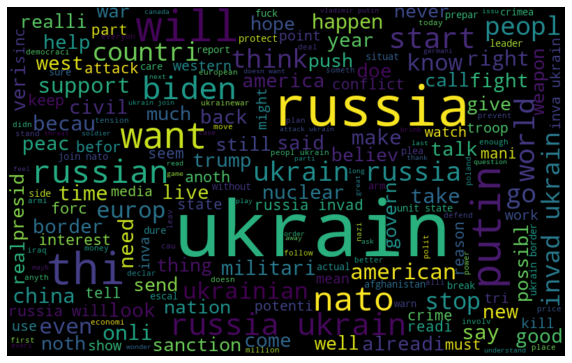

In [143]:
#Looking for the Neutrals


negative_words= ' '.join([text for text in df['tokenized_doc_clean'][df['sentiment_prediction']== 'neutral']])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [144]:
# hashtags


#collect hashtags

def hashtag_extract(x):
    hashtags=[]
    for i in x: #loop over words contain in tweet
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [145]:
#extracting hashtags from postives
ht_regular = hashtag_extract(df['tokenized_doc_clean'][df['sentiment_prediction']=='positive'])
#extracting hashtags from negatives
ht_negative=hashtag_extract(df['tokenized_doc_clean'][df['sentiment_prediction']=='negative'])
ht_regular = sum(ht_regular,[])
ht_negative = sum(ht_negative,[])

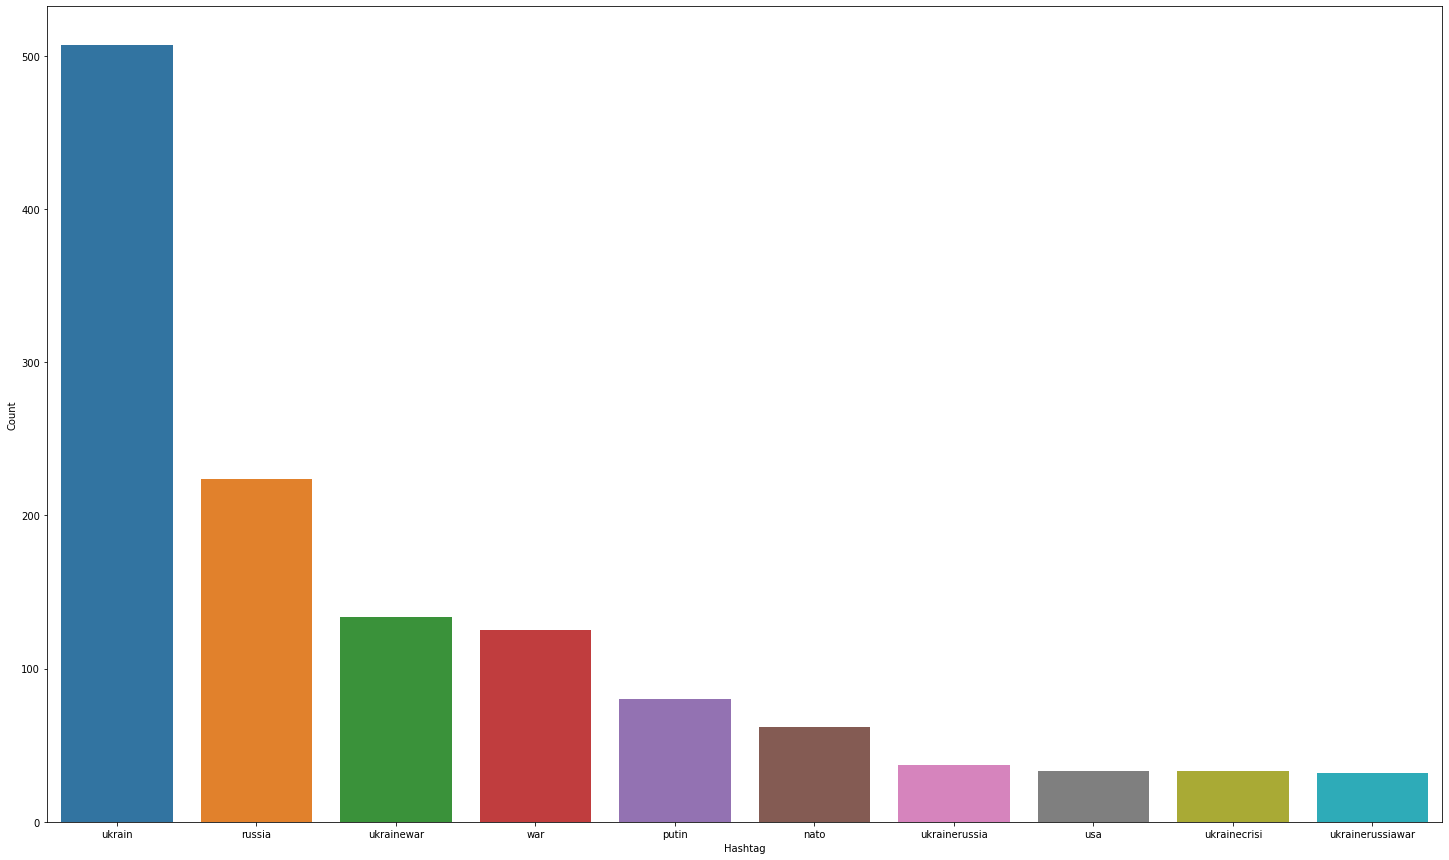

In [146]:
# positive tweets

pos_tweets = nltk.FreqDist(ht_regular)
df1 = pd.DataFrame({'Hashtag': list(pos_tweets.keys()),'Count':list(pos_tweets.values())})

#selecting top 20 most frequent hashtags
df1 = df1.nlargest(columns="Count",n=10)
plt.figure(figsize=(25,15))
ax = sns.barplot(data=df1, x="Hashtag", y="Count")
ax.set(ylabel = "Count")
plt.show()

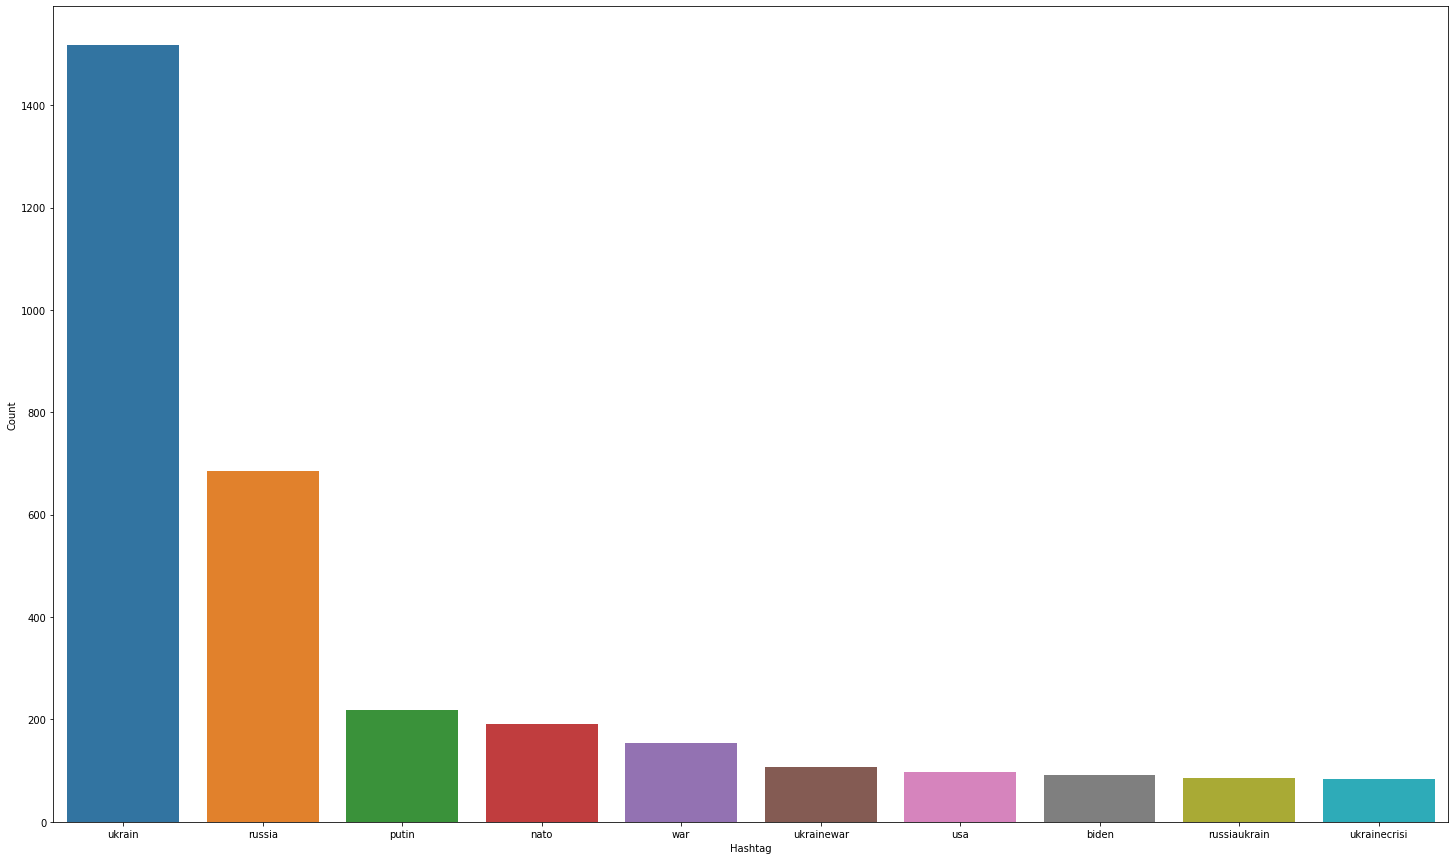

In [147]:
#negative tweets

neg_tweets = nltk.FreqDist(ht_negative)
df2 = pd.DataFrame({'Hashtag': list(neg_tweets.keys()),'Count': list(neg_tweets.values())}) #count number of occurrence of particular word

#selecting top 20 frequent  hashtags

df2 = df2.nlargest(columns = "Count",n=10)
plt.figure(figsize=(25,15))
ax = sns.barplot(data=df2, x="Hashtag",y="Count")
plt.show()

In [148]:
# Extracting features using bag-of-word, TF-IDF.

#TF-IDF

#TF = (number of times term appear in a document)/(Number of terms in dcoument)
#IDF = log(N/n)-N is nummber of documents and n is number of documents a term has appeared in.

#TF-IDF = TF * IDF

#tfidf_vectorizer= TfidfVectorizer(max_df=0.90, min_df=2,max_features =1000,stop_words='english')
#tfidf = tfidf_vectorizer.fit_transform(combine['tidy_tweet'])
#tfidf.shape

! pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [150]:
#Bag-of-words

#Each row in matrix M contains the frequency of tokens(words) in the document D(i)

bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(df['tokenized_doc_clean']) # tokenize and build vocabulary
bow.shape

(22409, 1000)

In [170]:
df = df.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df['sentiment_prediction'],
                                                    test_size=0.30, random_state=69)

In [171]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (15686, 1000)
X_test_shape :  (6723, 1000)
y_train_shape :  (15686,)
y_test_shape :  (6723,)


**Using Multinomial Naive Bayes Classifier**

In [172]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

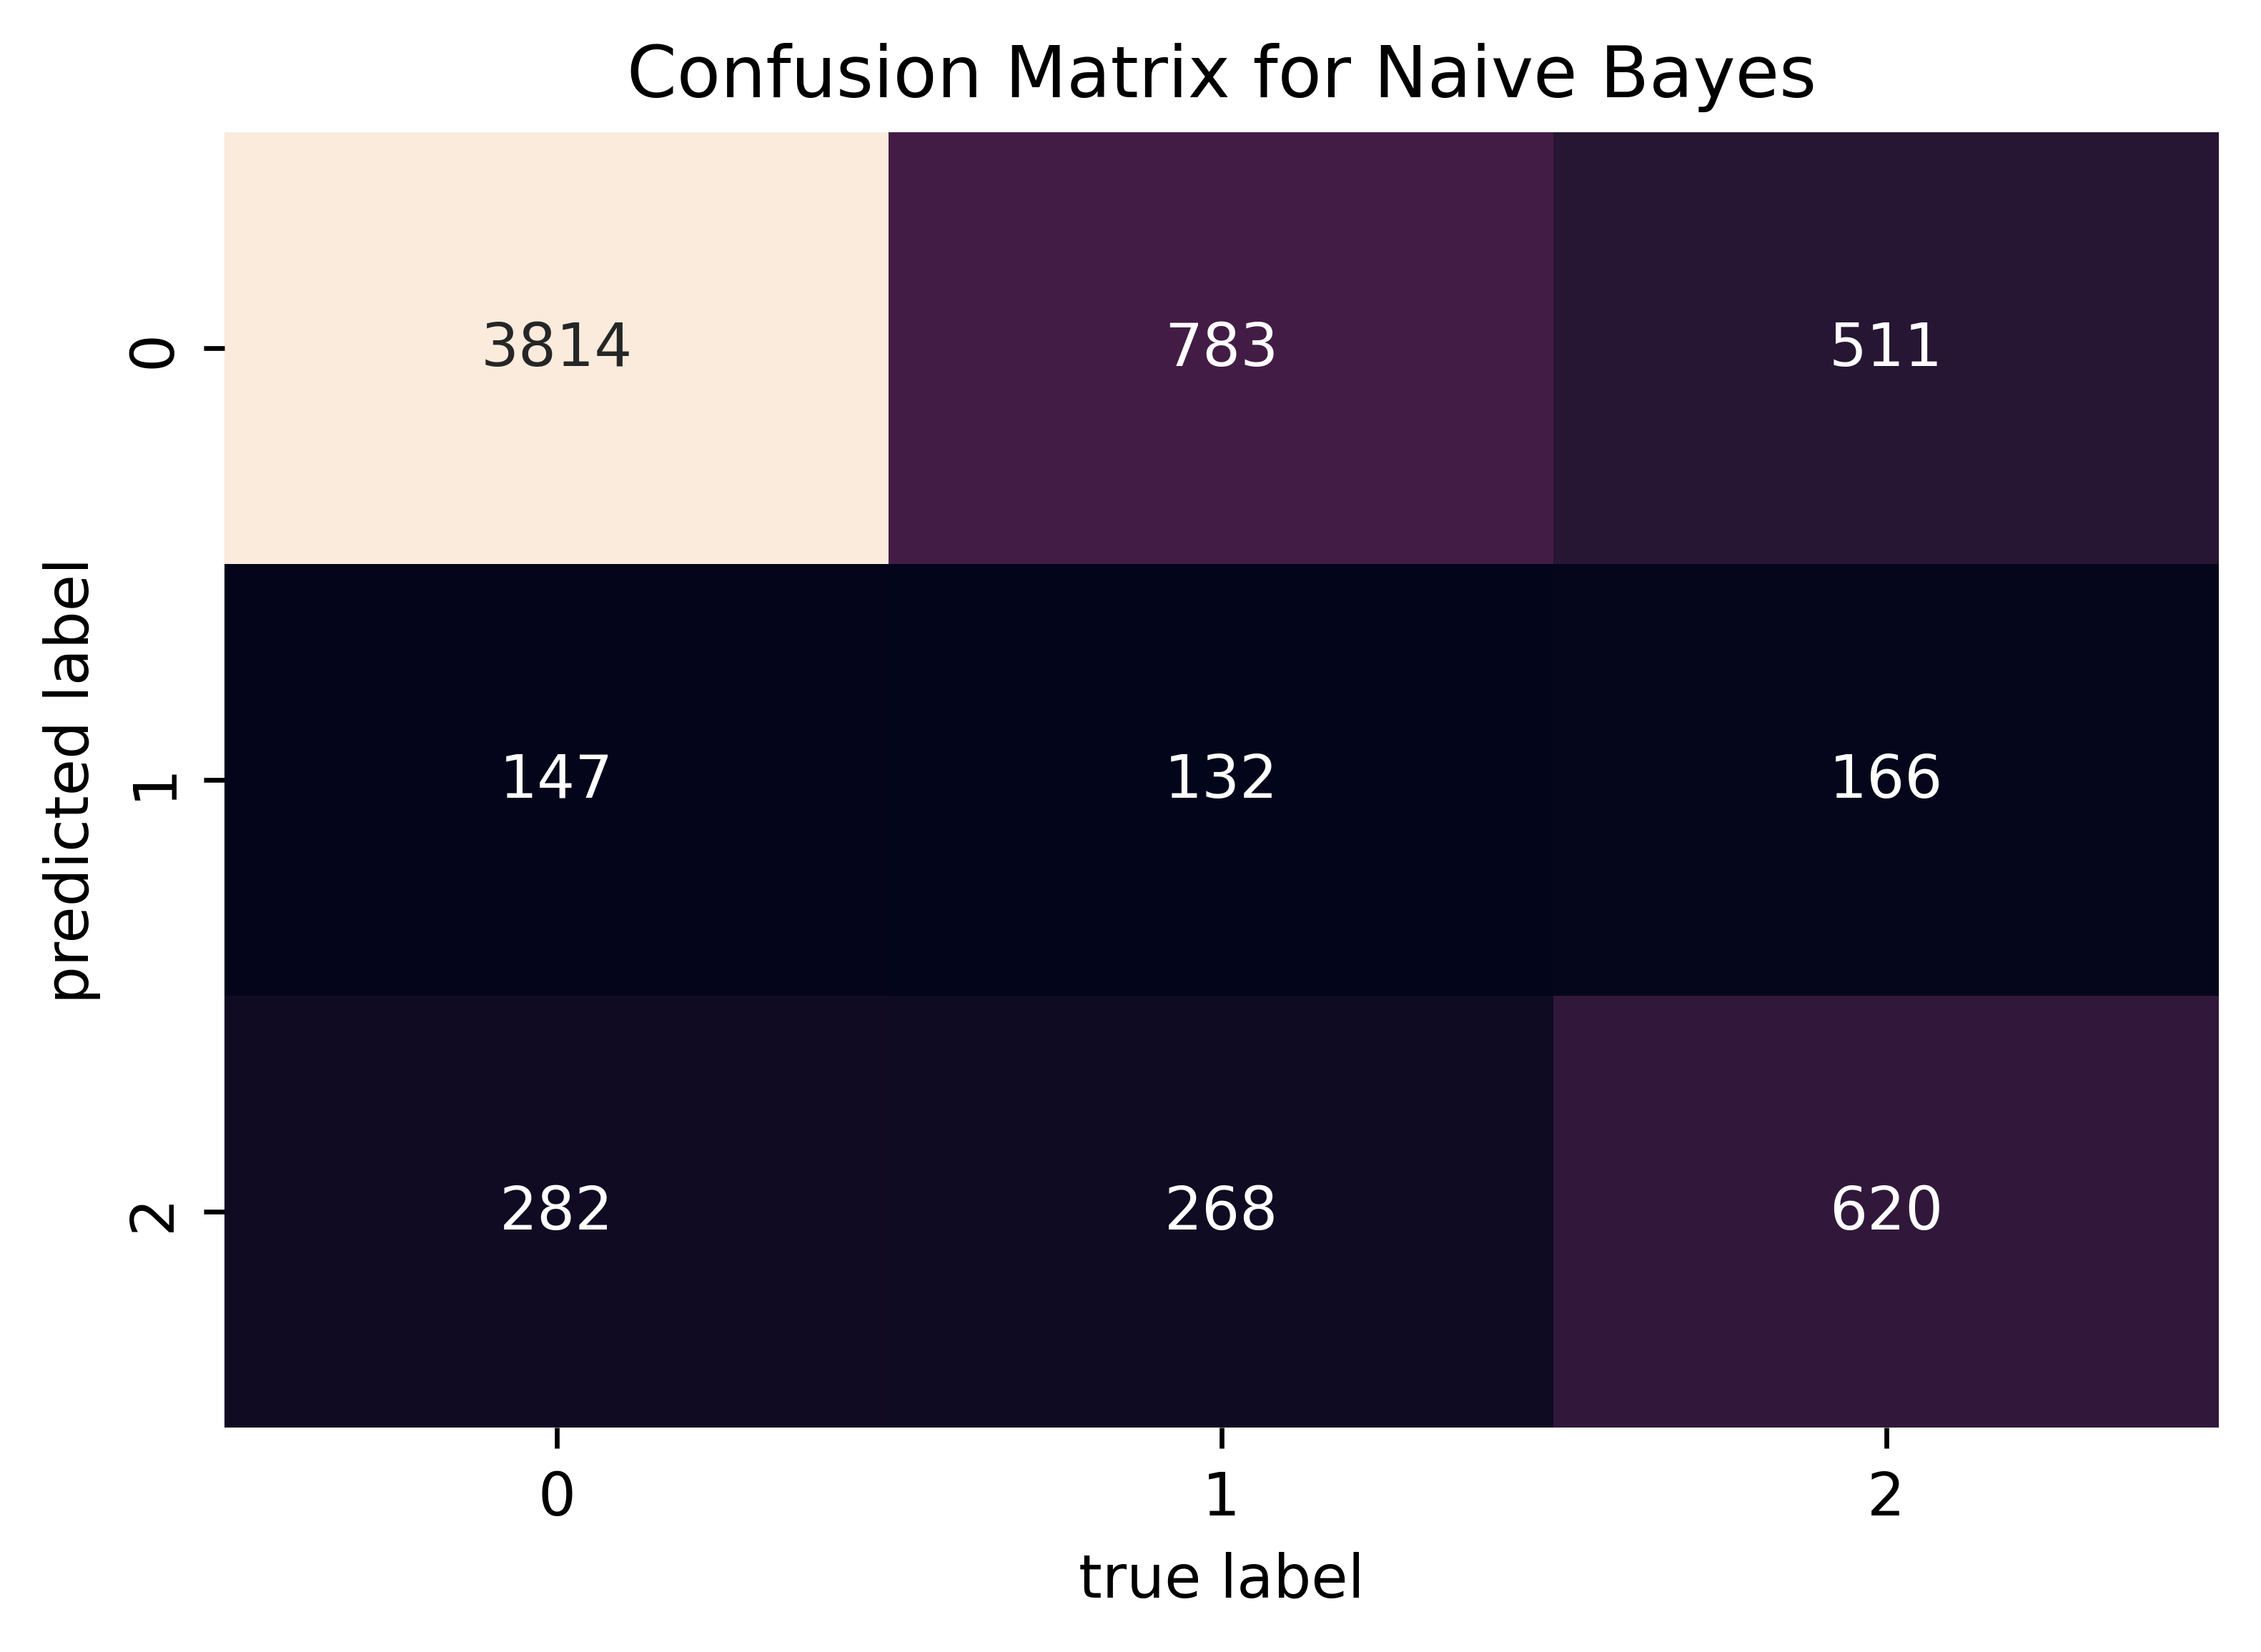

In [173]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [174]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.679161088799643
